### 必要モジュールのインポート

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import os
import cv2
import random
import kwcoco, kwplot
import matplotlib.pyplot as plt
from pathlib import Path
from mpl_toolkits.axes_grid1 import ImageGrid

# 1枚の画像を表示する関数
def show_img(img, dpi=150, title=None):
    fig, ax = plt.subplots(nrows=1, ncols=1, dpi=dpi)
    ax.set_title( title, fontsize=16, color='black')
    ax.axis('off')
    ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    return fig, ax

# 複数枚の画像を表示する関数
def show_imgs(imgs_dict:dict, ncol=0, dpi=200, font_scale=0.7):
    font_size = int(plt.rcParams["font.size"]*font_scale)

    if ncol > 0:
        nrow = ((len(imgs_dict)-1)//ncol)+1
    else:
        nrow = 1
        ncol = len(imgs_dict)

    img_num = len(imgs_dict)
    fig = plt.figure(figsize=(float(img_num), float(img_num)), dpi=dpi)
    grid = ImageGrid(fig, 111, nrows_ncols=(nrow, ncol), axes_pad=0.2,)

    for i in range(nrow*ncol):
        grid[i].axis('off')
        if i < len(imgs_dict):
            img_key = list(imgs_dict.keys())[i]
            grid[i].imshow(cv2.cvtColor(imgs_dict[img_key], cv2.COLOR_BGR2RGB))
            grid[i].set_title(img_key, fontsize=font_size, color='black', pad=int(font_size/2))
    
    plt.show(); plt.close()
    return None


### データセットを読み込む

In [2]:
coco_path = Path("../__datasets__/sample_coco_train2017/instances_train2017.json")
coco_img_root = Path("../__datasets__/sample_coco_train2017/")

coco = kwcoco.CocoDataset(data=coco_path, img_root=coco_img_root)

print(coco)

<CocoDataset(tag=instances_train2017.json, n_anns=712, n_imgs=100, n_videos=0, n_cats=80)>


## 1枚の画像についてアノテーション情報を確認してみる  

### 1枚のサンプル画像について情報を確認する

image ID : 544402


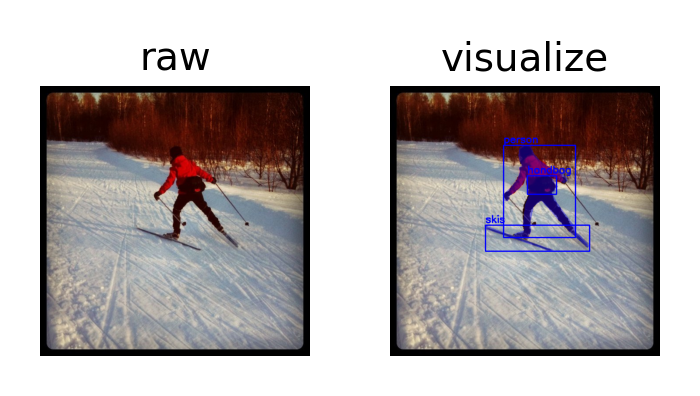

In [11]:
# 画像のサンプルIDを取得
sample_imgId = random.choice(list(coco.imgs.keys()))
print(f"image ID : {sample_imgId}")

# 画像を取得
img = coco.load_image(sample_imgId)

# アノテーションを描画した画像を取得
draw_img = coco.draw_image(sample_imgId)

# 辞書型で格納
imgs = {}
imgs["raw"] = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
imgs["visualize"] = cv2.cvtColor(draw_img, cv2.COLOR_BGR2RGB)

# 画像を表示
show_imgs(imgs, dpi=400)

### 上記で取得した画像についてアノテーションの生情報を確認する

In [34]:
# 読み込み先のアノテーションファイル(.jsonファイル)の保存場所を出力
print(f"JSONファイル : {coco.data_fpath}")

# 画像IDを再度確認
print(f"画像ID : {sample_imgId}")

# 画像に関する情報を確認
print(coco.imgs[sample_imgId])

# 画像に含まれるアノテーション情報を確認
annotation_ids = coco.index.gid_to_aids[sample_imgId]
for aid in annotation_ids:
    print(f"アノテーションID : {aid}")
    print(coco.anns[aid])



JSONファイル : ..\__datasets__\sample_coco_train2017\instances_train2017.json
画像ID : 544402
{'license': 1, 'file_name': '000000544402.jpg', 'coco_url': 'http://images.cocodataset.org/train2017/000000544402.jpg', 'height': 612, 'width': 612, 'date_captured': '2013-11-19 22:16:36', 'flickr_url': 'http://farm6.staticflickr.com/5214/5539587777_67147fc484_z.jpg', 'id': 544402}
アノテーションID : 2205498
{'segmentation': [[283.8, 334.13, 305.2, 327.44, 302.52, 308.72, 306.53, 269.94, 315.89, 248.55, 309.21, 217.79, 307.87, 205.76, 298.51, 224.48, 285.14, 237.85, 271.77, 248.55, 267.76, 260.58, 261.07, 260.58, 257.06, 247.21, 263.74, 239.19, 275.78, 228.49, 289.15, 211.11, 294.5, 195.06, 293.16, 184.36, 299.85, 180.35, 294.5, 169.66, 291.82, 158.96, 293.16, 140.24, 305.2, 133.55, 317.23, 133.55, 326.59, 154.95, 341.3, 170.99, 366.71, 188.38, 389.44, 197.74, 400.13, 207.1, 402.81, 213.78, 394.79, 220.47, 381.41, 212.45, 354.67, 200.41, 366.71, 212.45, 380.08, 227.15, 366.71, 240.53, 378.74, 264.59, 390.7

### もう少し詳しく

In [46]:
# 読み込み先のアノテーションファイル(.jsonファイル)の保存場所を出力
print(f"JSONファイル : {coco.data_fpath}")

# 画像IDを再度確認
print(f"画像ID : {sample_imgId}")

# 「画像に関する情報」とは何があるのか？
print("***********************************************************************")
print(coco.imgs[sample_imgId].keys())
print("画像のID      : ", coco.imgs[sample_imgId]["id"])
print("ファイル名    : ", coco.imgs[sample_imgId]["file_name"])
print("画像の高さ[px]: ", coco.imgs[sample_imgId]["height"])
print("画像の幅  [px]: ", coco.imgs[sample_imgId]["width"])
print("***********************************************************************")


# 「画像に含まれるアノテーション情報」とは何があるのか？
annotation_ids = coco.index.gid_to_aids[sample_imgId]
for aid in annotation_ids:
    print("++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")
    print(coco.anns[aid].keys())
    print(f"アノテーションID    : {aid}")
    print("アノテーションID     : ", coco.anns[aid]["id"])
    print("カテゴリーID         : ", coco.anns[aid]["category_id"])
    print("カテゴリー           : ", coco.cats[coco.anns[aid]["category_id"]])
    print("画像ID               : ", coco.anns[aid]["image_id"])
    print("BBox座標             : ", coco.anns[aid]["bbox"])
    print("セグメンテーション座標: ", coco.anns[aid]["segmentation"])
    print("++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")

JSONファイル : ..\__datasets__\sample_coco_train2017\instances_train2017.json
画像ID : 544402
***********************************************************************
dict_keys(['license', 'file_name', 'coco_url', 'height', 'width', 'date_captured', 'flickr_url', 'id'])
画像のID      :  544402
ファイル名    :  000000544402.jpg
画像の高さ[px]:  612
画像の幅  [px]:  612
***********************************************************************
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
dict_keys(['segmentation', 'area', 'iscrowd', 'image_id', 'bbox', 'category_id', 'id'])
アノテーションID    : 2205498
アノテーションID     :  2205498
カテゴリーID         :  1
カテゴリー           :  {'supercategory': 'person', 'id': 1, 'name': 'person'}
画像ID               :  544402
BBox座標             :  [257.06, 133.55, 163.13, 209.94]
セグメンテーション座標:  [[283.8, 334.13, 305.2, 327.44, 302.52, 308.72, 306.53, 269.94, 315.89, 248.55, 309.21, 217.79, 307.87, 205.76, 298.51, 224.48, 285.14, 237.85, 271.77, 248.55, 267.76, 260.58, 261